In [77]:
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold
from sklearn.preprocessing import StandardScaler
from imblearn.under_sampling import RandomUnderSampler
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, accuracy_score
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.models import Sequential
from scikeras.wrappers import KerasClassifier
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import Adam

In [32]:
df = pd.read_csv('../binary_all.csv')
df

,ID0,ID1,ID2,ID3,ID4,ID5,ID6,ID7,ID8,ID9,...,DATA_710,DATA_711,DATA_712,DATA_713,DATA_714,DATA_715,DATA_716,label,category,specific_class
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,BENIGN,BENIGN,BENIGN
1,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,BENIGN,BENIGN,BENIGN
2,0,0,0,0,0,0,0,1,0,0,...,1,1,1,1,1,1,1,BENIGN,BENIGN,BENIGN
3,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,BENIGN,BENIGN,BENIGN
4,0,0,0,0,0,0,0,1,1,1,...,0,0,0,0,0,0,0,BENIGN,BENIGN,BENIGN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1408214,0,0,0,0,0,0,0,0,0,1,...,0,1,0,0,0,1,0,ATTACK,SPOOFING,STEERING_WHEEL
1408215,0,0,0,0,0,0,0,0,0,1,...,0,1,0,0,0,1,0,ATTACK,SPOOFING,STEERING_WHEEL
1408216,0,0,0,0,0,0,0,0,0,1,...,0,1,0,0,0,1,0,ATTACK,SPOOFING,STEERING_WHEEL
1408217,0,0,0,0,0,0,0,0,0,1,...,0,1,0,0,0,1,0,ATTACK,SPOOFING,STEERING_WHEEL


In [33]:
df = df.drop(columns=[col for col in df.columns if 'ID' in col or col in ['label', 'category']])
df

,DATA_00,DATA_01,DATA_02,DATA_03,DATA_04,DATA_05,DATA_06,DATA_07,DATA_08,DATA_09,...,DATA_78,DATA_79,DATA_710,DATA_711,DATA_712,DATA_713,DATA_714,DATA_715,DATA_716,specific_class
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,BENIGN
1,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,BENIGN
2,0,0,0,0,0,0,0,0,0,0,...,0,1,1,1,1,1,1,1,1,BENIGN
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,BENIGN
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,BENIGN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1408214,0,0,0,0,0,0,0,0,0,1,...,0,0,0,1,0,0,0,1,0,STEERING_WHEEL
1408215,0,0,0,0,0,0,0,0,0,1,...,0,0,0,1,0,0,0,1,0,STEERING_WHEEL
1408216,0,0,0,0,0,0,0,0,0,1,...,0,0,0,1,0,0,0,1,0,STEERING_WHEEL
1408217,0,0,0,0,0,0,0,0,0,1,...,0,0,0,1,0,0,0,1,0,STEERING_WHEEL


In [34]:
from sklearn.calibration import LabelEncoder


label_encoder = LabelEncoder()
df['specific_class'] = label_encoder.fit_transform(df['specific_class'])
df['specific_class']

0          0
1          0
2          0
3          0
4          0
          ..
1408214    5
1408215    5
1408216    5
1408217    5
1408218    5
Name: specific_class, Length: 1408219, dtype: int32

In [35]:
X = df.drop(columns=['specific_class'])
y = df['specific_class']
y.value_counts()

specific_class
0    1223737
1      74663
3      54900
4      24951
5      19977
2       9991
Name: count, dtype: int64

In [36]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [106]:
scaler = StandardScaler()
X_train_resampled = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

d:\TA_IoV\IoV_venv\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [107]:
y_train_resampled  = to_categorical(y_train)
y_test_encoded = to_categorical(y_test)

In [108]:
# from sklearn.preprocessing import LabelEncoder

# label_encoder = LabelEncoder()
# y_train_resampled = label_encoder.fit_transform(y_train)
# y_test_encoded = label_encoder.transform(y_test)


In [109]:
model = Sequential()
model.add(Dense(64, input_dim=X_train_resampled.shape[1], activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(y_train_resampled.shape[1], activation='softmax'))

d:\TA_IoV\IoV_venv\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [110]:
early_stopping = EarlyStopping(
    monitor='val_loss',  
    patience=2,         
    restore_best_weights=True 
)

In [119]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
history = model.fit(X_train_resampled, y_train_resampled, epochs=25, batch_size=32, validation_split=0.2)

Epoch 1/25
24644/24644 ━━━━━━━━━━━━━━━━━━━━ 35s 1ms/step - accuracy: 0.9964 - loss: 0.0057 - val_accuracy: 0.9965 - val_loss: 0.0063
Epoch 2/25
24644/24644 ━━━━━━━━━━━━━━━━━━━━ 33s 1ms/step - accuracy: 0.9964 - loss: 0.0054 - val_accuracy: 0.9965 - val_loss: 0.0065
Epoch 3/25
24644/24644 ━━━━━━━━━━━━━━━━━━━━ 33s 1ms/step - accuracy: 0.9963 - loss: 0.0058 - val_accuracy: 0.9968 - val_loss: 0.0065
Epoch 4/25
24644/24644 ━━━━━━━━━━━━━━━━━━━━ 33s 1ms/step - accuracy: 0.9962 - loss: 0.0059 - val_accuracy: 0.9968 - val_loss: 0.0063
Epoch 5/25
24644/24644 ━━━━━━━━━━━━━━━━━━━━ 33s 1ms/step - accuracy: 0.9963 - loss: 0.0059 - val_accuracy: 0.9968 - val_loss: 0.0070
Epoch 6/25
24644/24644 ━━━━━━━━━━━━━━━━━━━━ 33s 1ms/step - accuracy: 0.9964 - loss: 0.0055 - val_accuracy: 0.9968 - val_loss: 0.0071
Epoch 7/25
24644/24644 ━━━━━━━━━━━━━━━━━━━━ 33s 1ms/step - accuracy: 0.9962 - loss: 0.0056 - val_accuracy: 0.9965 - val_loss: 0.0067
Epoch 8/25
24644/24644 ━━━━━━━━━━━━━━━━━━━━ 37s 2ms/step - accuracy: 

In [120]:
y_pred = model.predict(X_test)
y_pred_classes = y_pred.argmax(axis=1)
y_test_classes = y_test_encoded.argmax(axis=1) 

13203/13203 ━━━━━━━━━━━━━━━━━━━━ 12s 896us/step


In [121]:
print("Accuracy:", accuracy_score(y_test_classes, y_pred_classes))
print("\nClassification Report:\n", classification_report(y_test_classes, y_pred_classes))
print("\nConfusion Matrix:\n", confusion_matrix(y_test_classes, y_pred_classes))

Accuracy: 0.9963665715110802

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    367016
           1       1.00      1.00      1.00     22612
           2       1.00      1.00      1.00      3018
           3       1.00      0.91      0.95     16377
           4       0.83      1.00      0.91      7468
           5       1.00      1.00      1.00      5975

    accuracy                           1.00    422466
   macro avg       0.97      0.98      0.98    422466
weighted avg       1.00      1.00      1.00    422466


Confusion Matrix:
 [[367016      0      0      0      0      0]
 [     1  22611      0      0      0      0]
 [     0      0   3018      0      0      0]
 [     2      0      0  14846   1529      0]
 [     0      0      0      0   7468      0]
 [     3      0      0      0      0   5972]]


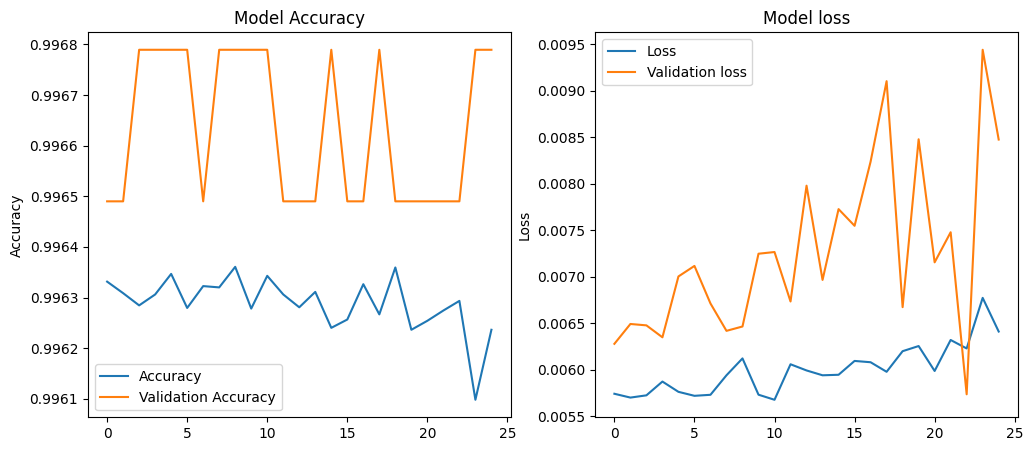

In [122]:
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title("Model Accuracy")
plt.ylabel("Accuracy")
plt.legend(["Accuracy", "Validation Accuracy"])

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title("Model loss")
plt.ylabel("Loss")
plt.legend(["Loss", "Validation loss"])